# Model Development: 
## Neural Network on Target Trait F_T

In [2]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [3]:
data = pd.read_csv('../data/cleaned/expanded_mbti_df.csv')

In [4]:
data.head()

,type,posts,comp_score,neg_score,neu_score,pos_score,post_count,avg_word_count,posts_cleaned,cleaned_comp_score,...,diff_comp_init-no_punct,E_I,N_S,F_T,J_P,E_I_code,N_S_code,F_T_code,J_P_code,type_code
0,INFJ,"[""'http://www.youtube.com/watch?v=qsXHcwe3krw""...",0.9877,0.054,0.829,0.116,50,90,['enfp and intj moments sportscenter not top t...,0.9839,...,0.0074,I,N,F,J,0,1,1,1,111
1,ENTP,"[""'I'm finding the lack of me in these posts v...",0.9994,0.068,0.752,0.180,50,138,"[""'I'm finding the lack of me in these posts v...",0.9993,...,0.0009,E,N,T,P,1,1,0,0,1100
2,INTP,"[""'Good one _____ https://www.youtube.com/w...",0.9985,0.074,0.751,0.175,50,102,"[""'Good one _____"", ""Of course, to which I say...",0.9985,...,0.0009,I,N,T,P,0,1,0,0,100
3,INTJ,"[""'Dear INTP, I enjoyed our conversation the...",0.9966,0.054,0.841,0.106,50,122,"[""'Dear INTP, I enjoyed our conversation the o...",0.9972,...,-0.0005,I,N,T,J,0,1,0,1,101
4,ENTJ,"[""'You're fired."", ""That's another silly misco...",0.9725,0.114,0.748,0.138,50,119,"[""'You're fired."", ""That's another silly misco...",0.9420,...,0.0218,E,N,T,J,1,1,0,1,1101


In [5]:
X = data.posts_no_digits

In [6]:
y = data.F_T_code

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify = y)

In [10]:
tokenizer = Tokenizer(750)

tokenizer.fit_on_texts(X_train)

x_train = tokenizer.texts_to_sequences(X_train)
x_test = tokenizer.texts_to_sequences(X_test)

x_train = pad_sequences(x_train)
x_test = pad_sequences(x_test)

<br>

***
***
***

<br>

In [11]:
model_5 = Sequential()
model_5.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model_5.add(LSTM(64, return_sequences = True, dropout = 0.2, recurrent_dropout = 0.2))
model_5.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model_5.add(Dense(200, activation = 'relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

model_5.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

history_5 = model_5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 25, verbose=1, callbacks = EarlyStopping(monitor='val_accuracy', patience=5))

Epoch 1/25
217/217 [==============================] - 902s 4s/step - loss: 0.6847 - accuracy: 0.5558 - val_loss: 0.6655 - val_accuracy: 0.6081
Epoch 2/25
217/217 [==============================] - 817s 4s/step - loss: 0.6533 - accuracy: 0.6246 - val_loss: 0.6916 - val_accuracy: 0.5239
Epoch 3/25
217/217 [==============================] - 887s 4s/step - loss: 0.6648 - accuracy: 0.5893 - val_loss: 0.6232 - val_accuracy: 0.6836
Epoch 4/25
217/217 [==============================] - 961s 4s/step - loss: 0.6649 - accuracy: 0.5659 - val_loss: 0.6884 - val_accuracy: 0.5412
Epoch 5/25
217/217 [==============================] - 1034s 5s/step - loss: 0.6578 - accuracy: 0.6052 - val_loss: 0.6843 - val_accuracy: 0.5585
Epoch 6/25
217/217 [==============================] - 1127s 5s/step - loss: 0.6592 - accuracy: 0.6063 - val_loss: 0.6891 - val_accuracy: 0.5412
Epoch 7/25
217/217 [==============================] - 1104s 5s/step - loss: 0.6583 - accuracy: 0.6066 - val_loss: 0.6241 - val_accuracy: 0.6

Text(0.5, 1.0, 'Results')

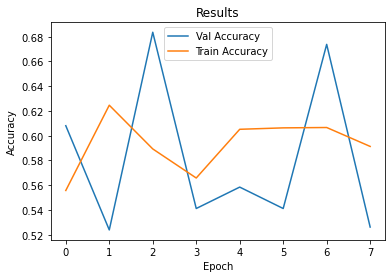

In [12]:
plt.plot(history_5.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')

<br>

***
***
***

<br>

In [13]:
model_6 = Sequential()
model_6.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model_6.add(Conv1D(64, 10, activation = 'relu'))
model_6.add(MaxPooling1D(5))
model_6.add(Conv1D(32, 7, activation = 'relu'))
model_6.add(Dense(1, activation = 'sigmoid'))

model_6.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

history_6 = model_6.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 25, verbose=1, callbacks = EarlyStopping(monitor='val_accuracy', patience=5))

Epoch 1/25
217/217 [==============================] - 75s 344ms/step - loss: 0.6707 - accuracy: 0.5680 - val_loss: 0.6537 - val_accuracy: 0.5974
Epoch 2/25
217/217 [==============================] - 72s 333ms/step - loss: 0.6499 - accuracy: 0.5993 - val_loss: 0.6517 - val_accuracy: 0.5990
Epoch 3/25
217/217 [==============================] - 74s 343ms/step - loss: 0.6487 - accuracy: 0.6002 - val_loss: 0.6515 - val_accuracy: 0.5989
Epoch 4/25
217/217 [==============================] - 80s 368ms/step - loss: 0.6449 - accuracy: 0.6035 - val_loss: 0.6519 - val_accuracy: 0.5965
Epoch 5/25
217/217 [==============================] - 75s 344ms/step - loss: 0.6432 - accuracy: 0.6052 - val_loss: 0.6494 - val_accuracy: 0.5994
Epoch 6/25
217/217 [==============================] - 74s 341ms/step - loss: 0.6412 - accuracy: 0.6066 - val_loss: 0.6521 - val_accuracy: 0.5968
Epoch 7/25
217/217 [==============================] - 73s 337ms/step - loss: 0.6373 - accuracy: 0.6087 - val_loss: 0.6527 - val_ac

Text(0.5, 1.0, 'Results')

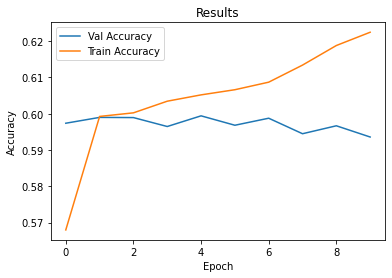

In [14]:
plt.plot(history_6.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')

<br>

***
***
***

<br>

In [15]:
model_7 = Sequential()
model_7.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model_7.add(Conv1D(64, 10, activation = 'relu'))
model_7.add(MaxPooling1D(5))
model_7.add(Conv1D(32, 7, activation = 'relu'))
model_7.add(MaxPooling1D(2))
model_7.add(Dense(1, activation = 'sigmoid'))

model_7.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

history_7 = model_7.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 25, verbose=1, callbacks = EarlyStopping(monitor='val_accuracy', patience=5))

Epoch 1/25
217/217 [==============================] - 73s 335ms/step - loss: 0.6704 - accuracy: 0.5662 - val_loss: 0.6551 - val_accuracy: 0.5956
Epoch 2/25
217/217 [==============================] - 71s 326ms/step - loss: 0.6493 - accuracy: 0.6003 - val_loss: 0.6542 - val_accuracy: 0.5949
Epoch 3/25
217/217 [==============================] - 79s 365ms/step - loss: 0.6447 - accuracy: 0.6050 - val_loss: 0.6517 - val_accuracy: 0.5987
Epoch 4/25
217/217 [==============================] - 69s 320ms/step - loss: 0.6418 - accuracy: 0.6072 - val_loss: 0.6503 - val_accuracy: 0.6004
Epoch 5/25
217/217 [==============================] - 65s 300ms/step - loss: 0.6385 - accuracy: 0.6104 - val_loss: 0.6460 - val_accuracy: 0.6038
Epoch 6/25
217/217 [==============================] - 66s 303ms/step - loss: 0.6357 - accuracy: 0.6127 - val_loss: 0.6498 - val_accuracy: 0.6023
Epoch 7/25
217/217 [==============================] - 47s 216ms/step - loss: 0.6317 - accuracy: 0.6160 - val_loss: 0.6497 - val_ac

Text(0.5, 1.0, 'Results')

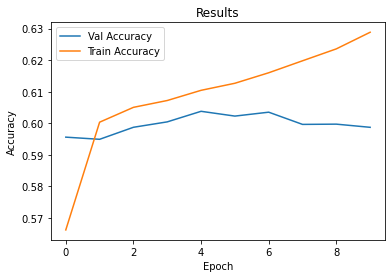

In [16]:
plt.plot(history_7.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_7.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')